<a href="https://colab.research.google.com/github/JayCayetano/ML_SP_Project/blob/main/ML_Test_v_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Used the following as guides: 
# https://github.com/jmonish/Morgan-Stanley-Summer-Data-Challenge 
# https://www.youtube.com/watch?v=Iu5T2TZumxU&list=PLBhJnyA0V0uLLhGrJTKLNYfd7_Q-8_jja&index=25
# https://towardsdatascience.com/feature-selection-with-pandas-e3690ad8504b 
# https://towardsdatascience.com/in-12-minutes-stocks-analysis-with-pandas-and-scikit-learn-a8d8a7b50ee7 
# Library Imports 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
plt.style.use('fivethirtyeight')  
import seaborn as sb 
import seaborn as sns
%matplotlib inline

from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso
import warnings 
warnings.filterwarnings('ignore')

In [3]:
# Load data 
from google.colab import files 
files.upload()

Saving KO-2.csv to KO-2.csv


{'KO-2.csv': b'Date,Open,High,Low,Close,Adj Close,Volume\n2023-04-11,62.650002,62.709999,62.400002,62.580002,62.580002,9913000\n2023-04-12,62.480000,63.029999,62.310001,62.689999,62.689999,9593700\n2023-04-13,62.759998,63.160000,62.480000,63.150002,63.150002,9871400\n2023-04-14,63.049999,63.150002,62.779999,63.049999,63.049999,8945300\n2023-04-17,63.320000,63.529999,63.139999,63.459999,63.459999,9452400\n2023-04-18,63.509998,63.599998,63.189999,63.560001,63.560001,9035700\n2023-04-19,63.730000,63.830002,63.430000,63.680000,63.680000,9769500\n2023-04-20,63.630001,64.000000,63.439999,63.959999,63.959999,10706400\n2023-04-21,64.000000,64.269997,63.799999,64.050003,64.050003,12925700\n2023-04-24,64.750000,64.989998,63.619999,63.950001,63.950001,15532300\n2023-04-25,64.169998,64.169998,63.630001,63.849998,63.849998,12818900\n2023-04-26,63.560001,63.770000,63.389999,63.549999,63.549999,13179600\n2023-04-27,63.529999,63.759998,63.110001,63.680000,63.680000,13795800\n2023-04-28,63.610001,64.16

In [4]:
# Import Datatset 
ko = pd.read_csv('KO-2.csv')
ko.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2023-04-11,62.650002,62.709999,62.400002,62.580002,62.580002,9913000
1,2023-04-12,62.480000,63.029999,62.310001,62.689999,62.689999,9593700
2,2023-04-13,62.759998,63.160000,62.480000,63.150002,63.150002,9871400
3,2023-04-14,63.049999,63.150002,62.779999,63.049999,63.049999,8945300
4,2023-04-17,63.320000,63.529999,63.139999,63.459999,63.459999,9452400


In [5]:
# Aided with help from Computer Science: Stock Prediction Using Machine Learning Algorithms 
# https://www.youtube.com/watch?v=Iu5T2TZumxU&list=PLBhJnyA0V0uLLhGrJTKLNYfd7_Q-8_jja&index=25
# Show and store the last row of data 
actual_price = ko.tail(1)
# Show the data 
actual_price

,Date,Open,High,Low,Close,Adj Close,Volume
14,2023-05-01,64.150002,64.690002,64.059998,64.300003,64.300003,9091500


In [6]:
# Prepare the data - get all the data, except the last row 
ko = ko.head(len(ko) - 1) 

# Show the data 
ko

,Date,Open,High,Low,Close,Adj Close,Volume
0,2023-04-11,62.650002,62.709999,62.400002,62.580002,62.580002,9913000
1,2023-04-12,62.480000,63.029999,62.310001,62.689999,62.689999,9593700
2,2023-04-13,62.759998,63.160000,62.480000,63.150002,63.150002,9871400
3,2023-04-14,63.049999,63.150002,62.779999,63.049999,63.049999,8945300
4,2023-04-17,63.320000,63.529999,63.139999,63.459999,63.459999,9452400
5,2023-04-18,63.509998,63.599998,63.189999,63.560001,63.560001,9035700
6,2023-04-19,63.730000,63.830002,63.430000,63.680000,63.680000,9769500
7,2023-04-20,63.630001,64.000000,63.439999,63.959999,63.959999,10706400
8,2023-04-21,64.000000,64.269997,63.799999,64.050003,64.050003,12925700
9,2023-04-24,64.750000,64.989998,63.619999,63.950001,63.950001,15532300


In [7]:
# Shows the amount of rows and columns (features)
ko.shape

(14, 7)

In [8]:
# Give a description of the dataset
ko.describe()

,Open,High,Low,Close,Adj Close,Volume
count,14.000000,14.000000,14.000000,14.000000,14.000000,1.400000e+01
mean,63.482143,63.723571,63.157143,63.525715,63.525715,1.137331e+07
std,0.613241,0.594275,0.485107,0.492431,0.492431,2.182122e+06
min,62.480000,62.709999,62.310001,62.580002,62.580002,8.945300e+06
25%,63.117499,63.252500,62.862499,63.227501,63.227501,9.637650e+06
50%,63.545000,63.764999,63.289999,63.620001,63.620001,1.030970e+07
75%,63.705000,64.120003,63.470000,63.925000,63.925000,1.311612e+07
max,64.750000,64.989998,63.799999,64.150002,64.150002,1.553230e+07


In [9]:
ko.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       14 non-null     object 
 1   Open       14 non-null     float64
 2   High       14 non-null     float64
 3   Low        14 non-null     float64
 4   Close      14 non-null     float64
 5   Adj Close  14 non-null     float64
 6   Volume     14 non-null     int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 912.0+ bytes


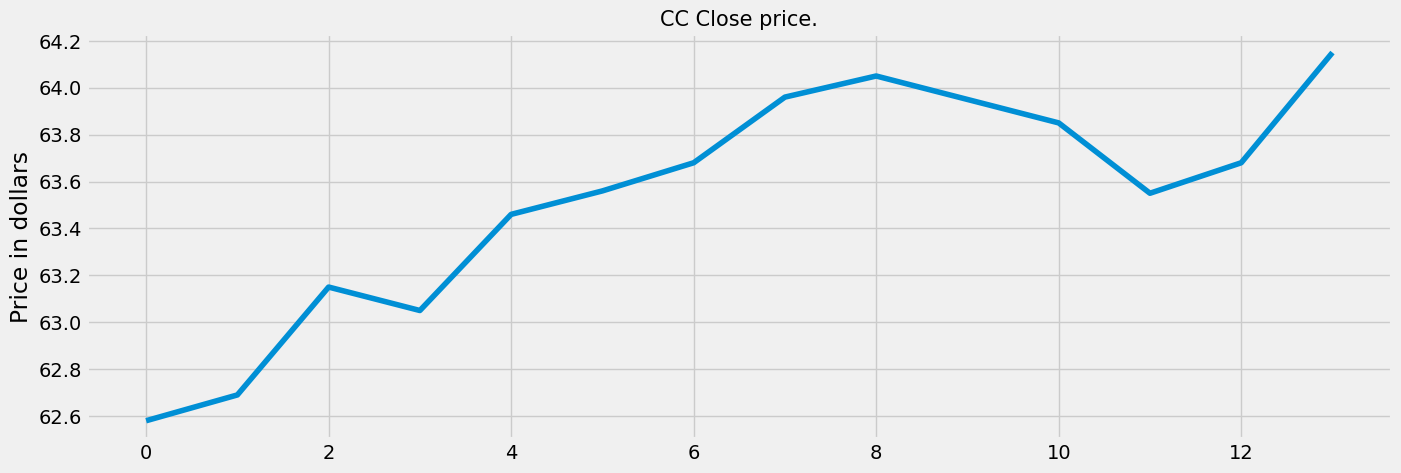

In [10]:
# Exploratory Data Analysis 
# This is an approach to analyze data using visual techniques 
# Used to discover trends, patterns, check assumptions, using 
# statistical summaries and graphical representations. 
# Perform EDA to analyze how prices of the stock have moved 
# over times and how the end of qurater affects stock prices 
plt.figure(figsize = (15, 5))
plt.plot(ko['Close'])
plt.title('CC Close price.', fontsize = 15)
plt.ylabel('Price in dollars')
plt.show()
# Shows the price of KO stocks, depicted by the plot of the 
# closing price of the stocks 

In [11]:
# Returns the first five fows, string from the top 
ko.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2023-04-11,62.650002,62.709999,62.400002,62.580002,62.580002,9913000
1,2023-04-12,62.480000,63.029999,62.310001,62.689999,62.689999,9593700
2,2023-04-13,62.759998,63.160000,62.480000,63.150002,63.150002,9871400
3,2023-04-14,63.049999,63.150002,62.779999,63.049999,63.049999,8945300
4,2023-04-17,63.320000,63.529999,63.139999,63.459999,63.459999,9452400


In [12]:
# Check if the data in the 'Close' and 'Adj Close' columns are 
# the same. This code is filtering rows where the values 
# are equal, and returning the shape of the resulting DF as a 
# tuple of the form '(num_rows, num_columns)'
ko[ko['Close'] == ko['Adj Close']].shape

(14, 7)

In [13]:
# Drop the Adj Close column 
# aapl = aapl.drop(['Adj Close'], axis = 1)

In [14]:
# Check for null values if any are present in data frame 
# Returns dataframe of teh same shape, where each element 
# is a boolean value indicating whether element is a missing 
# value or not 
# aapl.isnull().sum()

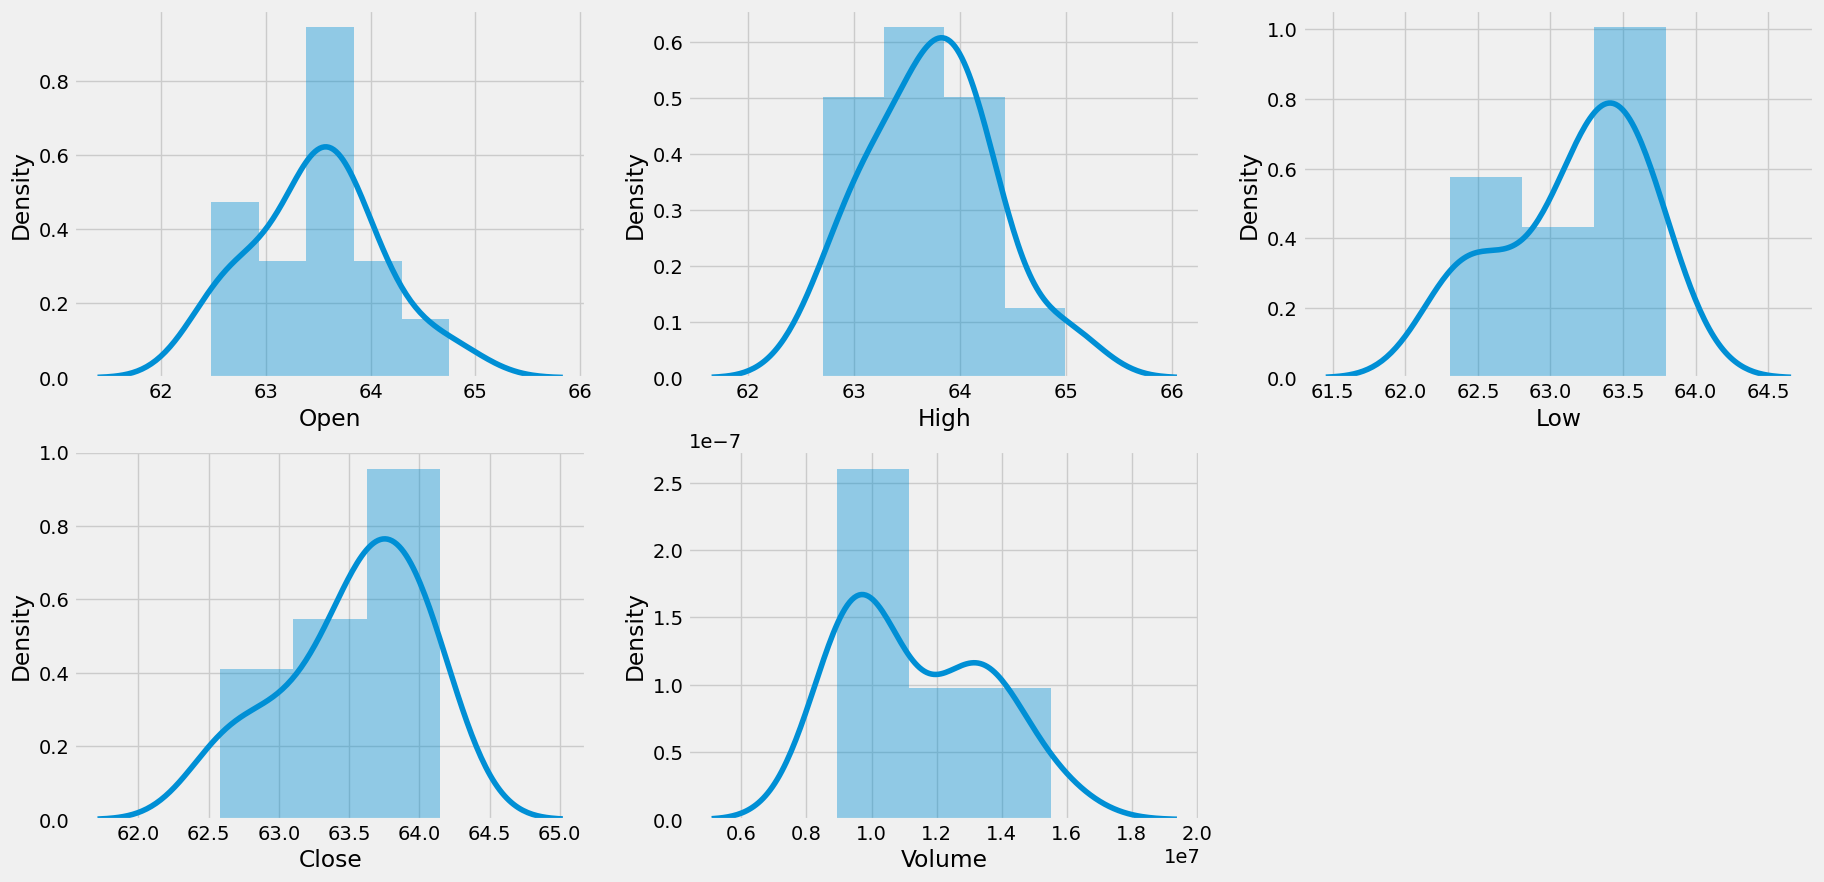

In [15]:
# Seeing no null values in the data, create charts
# Plots the distribution of stock market data by the columns below

features = ['Open', 'High', 'Low', 'Close', 'Volume']

plt.subplots(figsize = (20, 10)) 
for i, col in enumerate(features) : 
  plt.subplot(2, 3, i+1) 
  sb.distplot(ko[col])
plt.show()

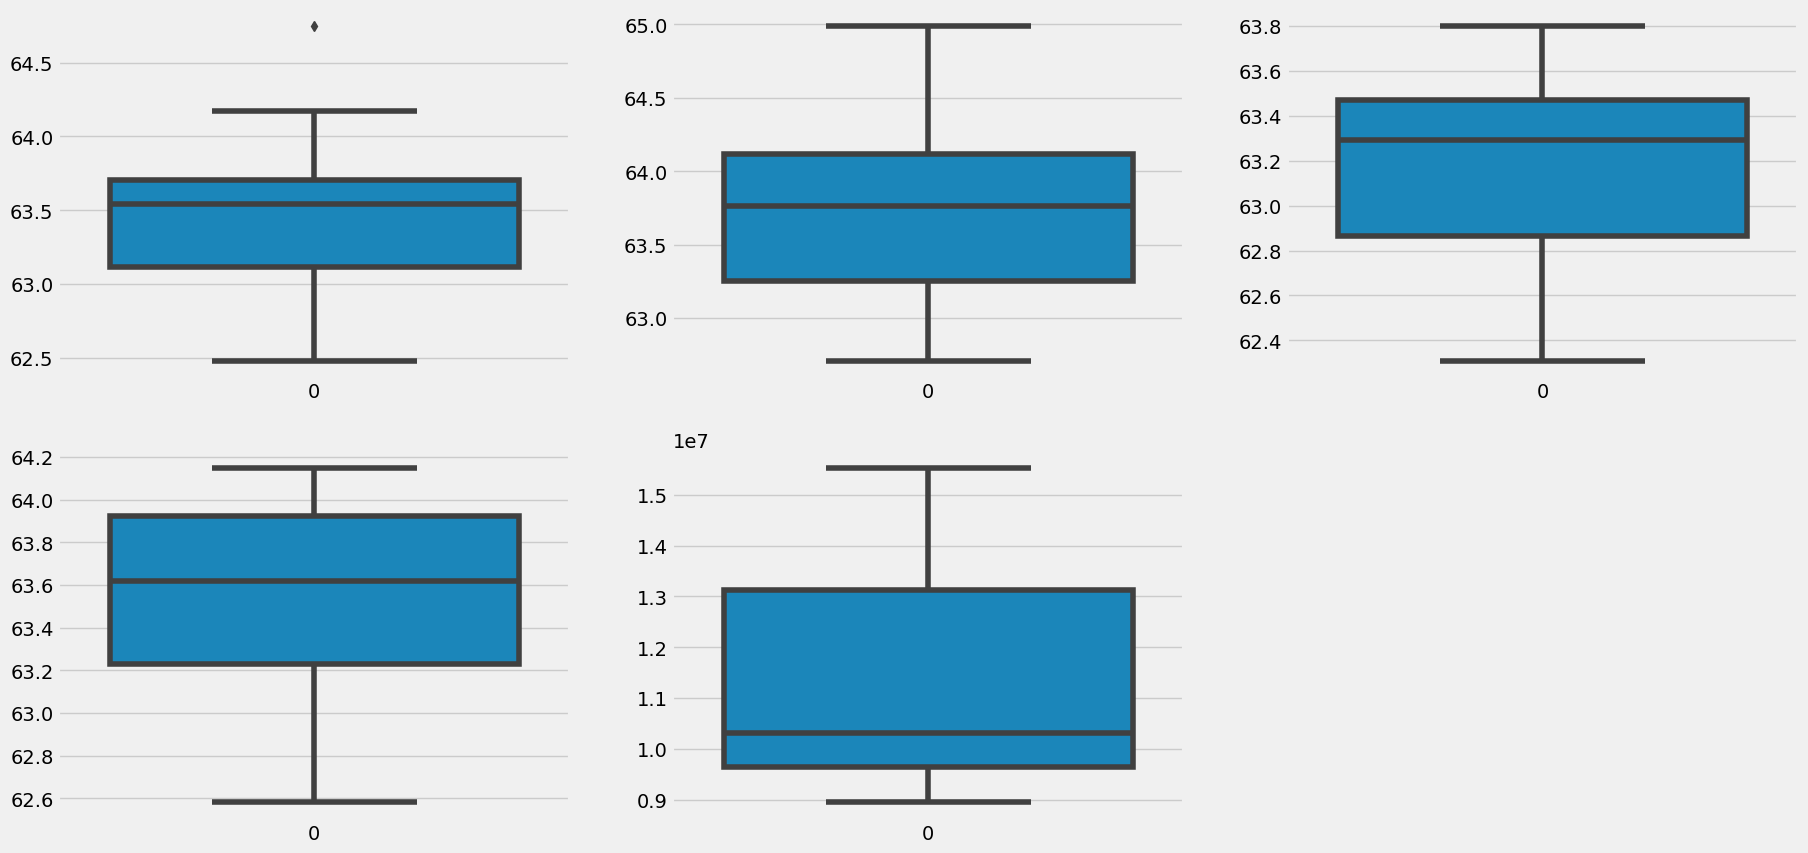

In [16]:
plt.subplots(figsize=(20,10))
for i, col in enumerate(features):
  plt.subplot(2,3,i+1)
  sb.boxplot(ko[col])
plt.show()
# Conclude on volume data contains outliers in it, but the data 
# in the rest of the columns are free from any outlier 

In [17]:
# Show and store the last row of data 
actual_price = ko.tail(1)
# Show the data 
actual_price

,Date,Open,High,Low,Close,Adj Close,Volume
13,2023-04-28,63.610001,64.160004,63.48,64.150002,64.150002,13686700


In [18]:
# Prepare the data - get all the data, except the last row 
ko  = ko.head(len(ko) - 1) 

# Show the data 
ko

,Date,Open,High,Low,Close,Adj Close,Volume
0,2023-04-11,62.650002,62.709999,62.400002,62.580002,62.580002,9913000
1,2023-04-12,62.480000,63.029999,62.310001,62.689999,62.689999,9593700
2,2023-04-13,62.759998,63.160000,62.480000,63.150002,63.150002,9871400
3,2023-04-14,63.049999,63.150002,62.779999,63.049999,63.049999,8945300
4,2023-04-17,63.320000,63.529999,63.139999,63.459999,63.459999,9452400
5,2023-04-18,63.509998,63.599998,63.189999,63.560001,63.560001,9035700
6,2023-04-19,63.730000,63.830002,63.430000,63.680000,63.680000,9769500
7,2023-04-20,63.630001,64.000000,63.439999,63.959999,63.959999,10706400
8,2023-04-21,64.000000,64.269997,63.799999,64.050003,64.050003,12925700
9,2023-04-24,64.750000,64.989998,63.619999,63.950001,63.950001,15532300


In [19]:
# Create an empty list to store dependent and independent data 
days = list() 
adj_close_prices = list()

In [20]:
# Get dates and adjusted closed prices 
ko_days = ko.loc[:, 'Date'] # Get all of the rows from Date column
ko_adj_close = ko.loc[:, 'Adj Close'] 

In [21]:
# Create the independent data set (dates) 
for day in ko_days:
  days.append([int(day.split('-')[2])]) #brackets make a list 
# Create the dependent data set (adj close) 
for adj_close_price in ko_adj_close:
  adj_close_prices.append(float(adj_close_price))

In [22]:
# Show days 
days

[[11], [12], [13], [14], [17], [18], [19], [20], [21], [24], [25], [26], [27]]

In [23]:
adj_close_prices

[62.580002,
 62.689999,
 63.150002,
 63.049999,
 63.459999,
 63.560001,
 63.68,
 63.959999,
 64.050003,
 63.950001,
 63.849998,
 63.549999,
 63.68]

In [24]:
# Create three models to make predictions 
lin_svr = SVR(kernel='linear', C = 1000.0) 
lin_svr.fit(days, adj_close_prices)

poly_svr = SVR(kernel='poly', C = 1000.0, degree = 2) 
poly_svr.fit(days, adj_close_prices)

rbf_svr = SVR(kernel='rbf', C = 1000.0, gamma = 0.85) 
rbf_svr.fit(days, adj_close_prices)

SVR(C=1000.0, gamma=0.85)

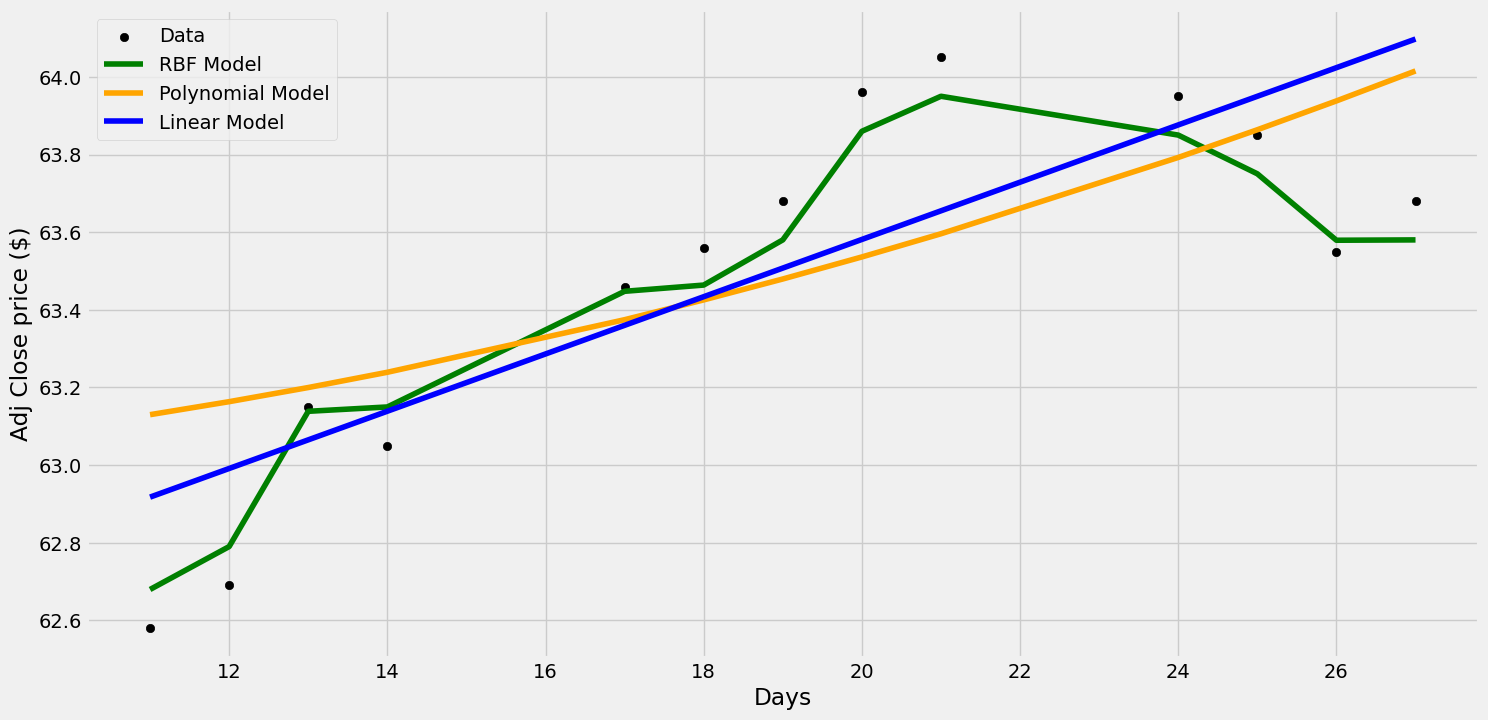

In [25]:
# Plot models 
plt.figure(figsize = (16, 8))
plt.scatter(days, adj_close_prices, color = 'black', label = 'Data')
plt.plot(days, rbf_svr.predict(days), color = 'green', label = 'RBF Model')
plt.plot(days, poly_svr.predict(days), color = 'orange', label = 'Polynomial Model')
plt.plot(days, lin_svr.predict(days), color = 'blue', label = 'Linear Model')
plt.xlabel('Days')
plt.ylabel('Adj Close price ($)')
plt.legend()
plt.show()

In [26]:
# Show the predicted price for the given day 
day = [[27]] 
print('The RBF SVR predicted price: ', rbf_svr.predict(day))
print('The Linear SVR predicted price: ', lin_svr.predict(day))
print('The Polynomial SVR predicted price: ', poly_svr.predict(day))

The RBF SVR predicted price:  [63.58009884]
The Linear SVR predicted price:  [64.09749775]
The Polynomial SVR predicted price:  [64.01528351]


In [27]:
# Show the actual price
print('The actual price: ', actual_price['Adj Close'])

The actual price:  13    64.150002
Name: Adj Close, dtype: float64


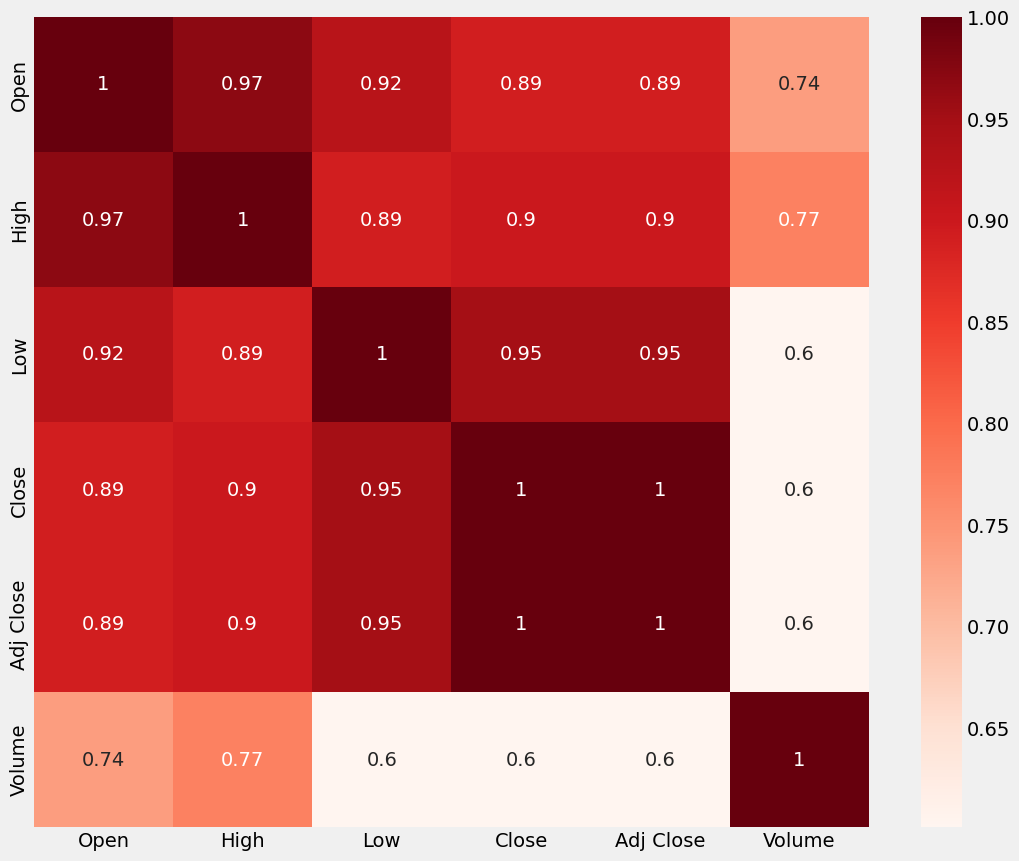

In [28]:
# Aided with https://towardsdatascience.com/feature-selection-with-pandas-e3690ad8504b
# Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = ko.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [29]:
ko

,Date,Open,High,Low,Close,Adj Close,Volume
0,2023-04-11,62.650002,62.709999,62.400002,62.580002,62.580002,9913000
1,2023-04-12,62.480000,63.029999,62.310001,62.689999,62.689999,9593700
2,2023-04-13,62.759998,63.160000,62.480000,63.150002,63.150002,9871400
3,2023-04-14,63.049999,63.150002,62.779999,63.049999,63.049999,8945300
4,2023-04-17,63.320000,63.529999,63.139999,63.459999,63.459999,9452400
5,2023-04-18,63.509998,63.599998,63.189999,63.560001,63.560001,9035700
6,2023-04-19,63.730000,63.830002,63.430000,63.680000,63.680000,9769500
7,2023-04-20,63.630001,64.000000,63.439999,63.959999,63.959999,10706400
8,2023-04-21,64.000000,64.269997,63.799999,64.050003,64.050003,12925700
9,2023-04-24,64.750000,64.989998,63.619999,63.950001,63.950001,15532300


In [30]:


#Correlation with output variable
cor_target = abs(cor["Close"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.2]
rel_feat = pd.DataFrame(relevant_features.index)
rel_feat.columns = ["sel_col"]

In [31]:
ko_df = ko[rel_feat["sel_col"]]
# aal_df['Date']=aal1['Date']

In [32]:
print(len(ko.columns), len(rel_feat))

7 6


In [33]:
ko_close_px = ko_df['Close']

In [34]:
# Aided with: https://towardsdatascience.com/in-12-minutes-stocks-analysis-with-pandas-and-scikit-learn-a8d8a7b50ee7
mavg = ko_close_px.rolling(window=100).mean()

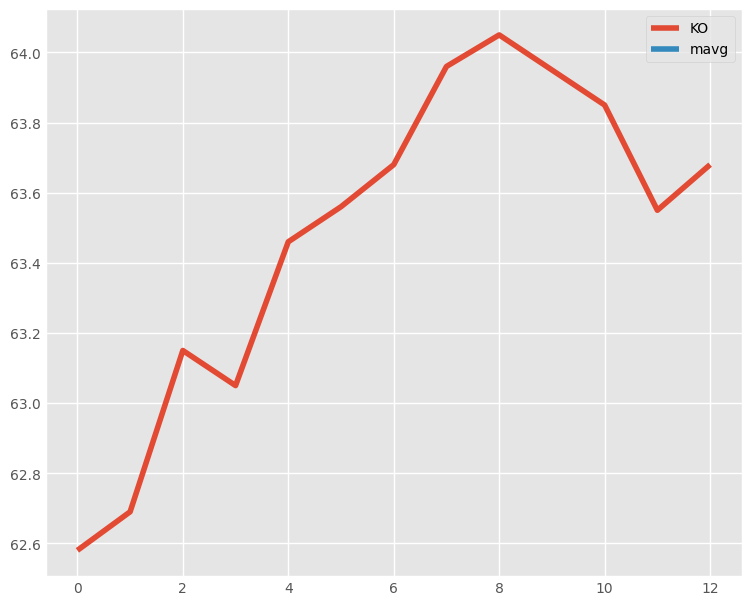

In [35]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import style

# Adjusting the size of matplotlib
import matplotlib as mpl
mpl.rc('figure', figsize=(8, 7))
mpl.__version__

# Adjusting the style of matplotlib
style.use('ggplot')
ko_close_px.plot(label='KO')
mavg.plot(label='mavg')
plt.legend()

<Axes: >

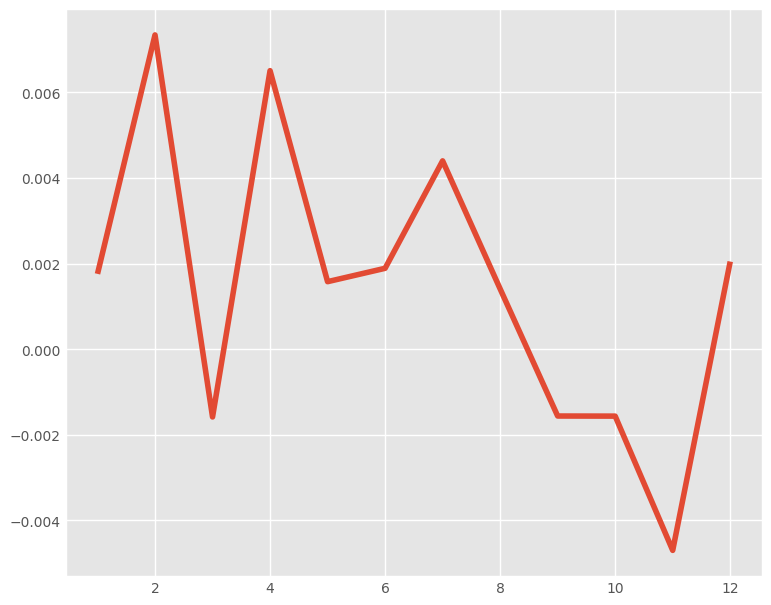

In [36]:
rets = ko_close_px/ko_close_px.shift(1) - 1
rets.plot(label='return')

In [37]:
ko_df = ko_df.iloc[1:]